# Exploritory Analysis on Superstore Data

In [8]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)

#defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'craig-shaffer-data-445-bucket'
bucket = s3.Bucket(bucket_name)

#defining the file to be read from s3 bucket
file_key = 'superstore_data.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#reading the datafile
store = pd.read_csv(file_content_stream)
store.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


**Exploring the data**

In [9]:
store.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [10]:
store.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [11]:
store.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

**Imputing missing data**

In [12]:
#imputing income with median

#creating indicator variable for observations with imputed profession (1 for imputed, 0 if not)
store['Income_imp'] = store['Income'].isna().astype(int)

#imputing income
store['Income'] = store['Income'].fillna(store['Income'].median())

#checking if null values remain
store.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
Income_imp             0
dtype: int64

In [13]:
store.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Income_imp
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375,0.010714
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391,0.102977
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000


**Visualizing the data**

<AxesSubplot: title={'center': 'Variable: Complain'}, xlabel='Complain', ylabel='count'>

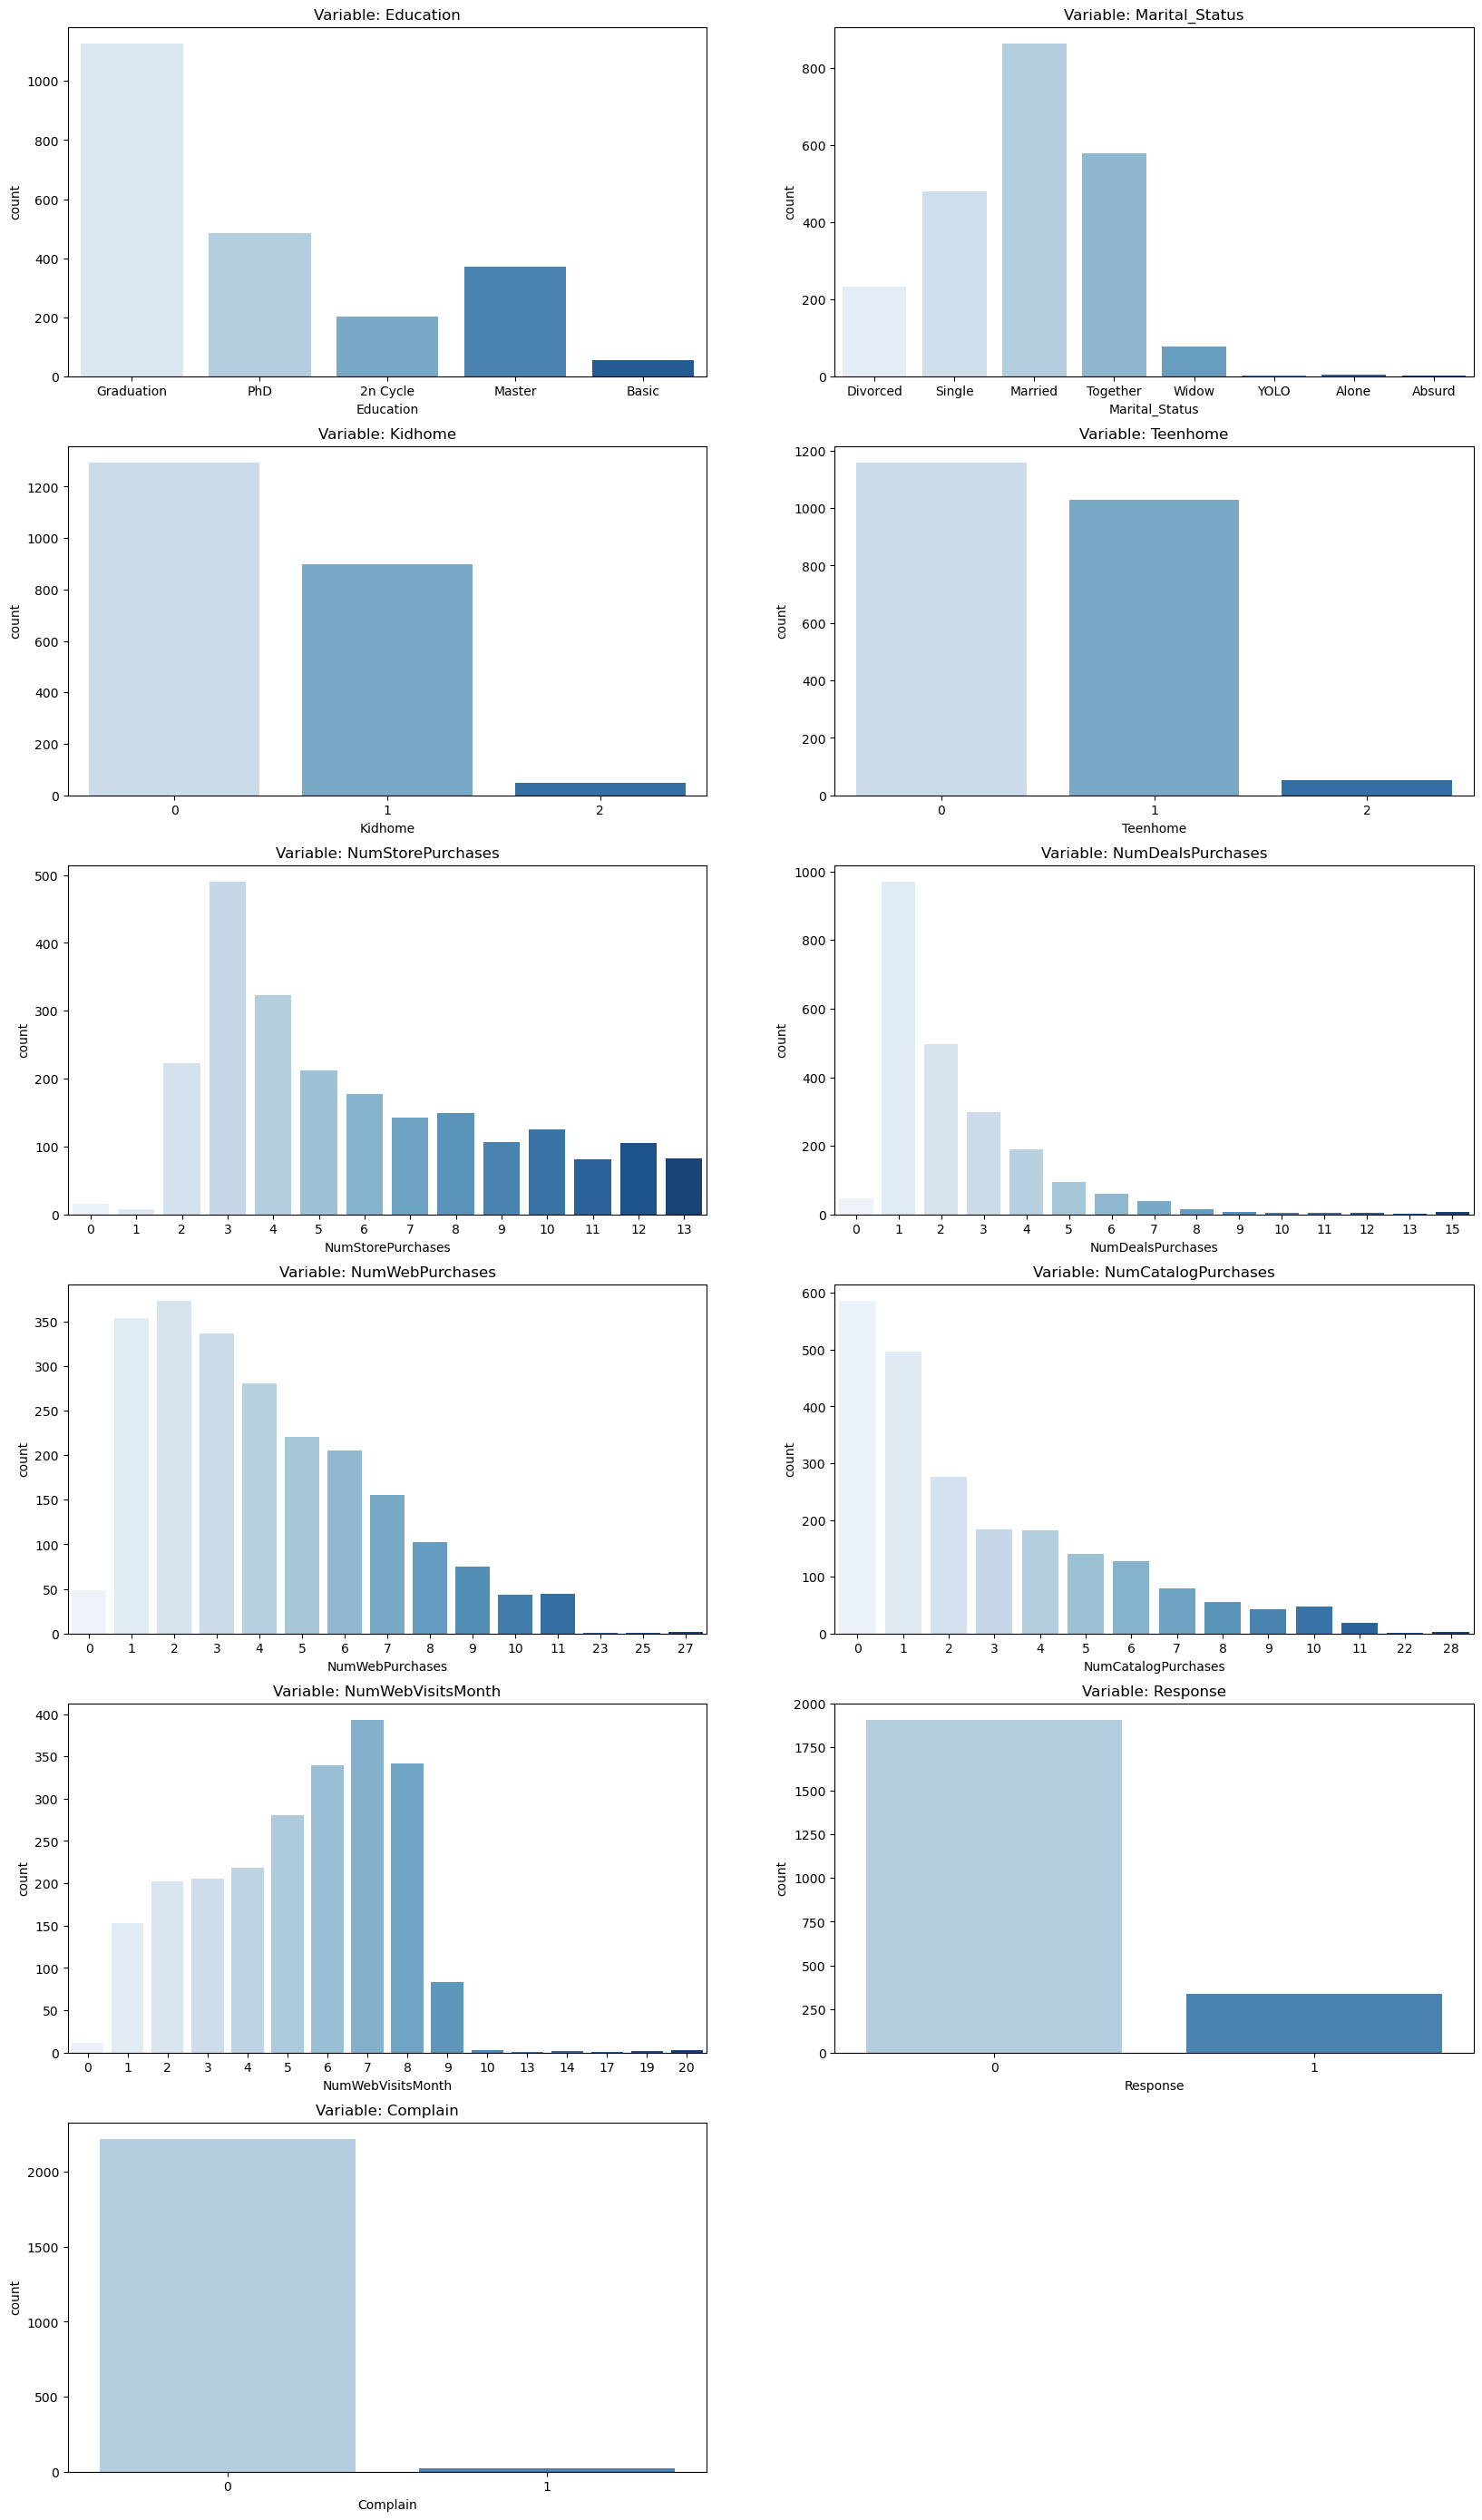

In [20]:
plt.figure(figsize = (20,35))

plt.subplot(6,2,1)
plt.gca().set_title('Variable: Education')
sns.countplot(x = 'Education', palette = 'Blues', data = store)

plt.subplot(6,2,2)
plt.gca().set_title('Variable: Marital_Status')
sns.countplot(x = 'Marital_Status', palette = 'Blues', data = store)

plt.subplot(6,2,3)
plt.gca().set_title('Variable: Kidhome')
sns.countplot(x = 'Kidhome', palette = 'Blues', data = store)

plt.subplot(6,2,4)
plt.gca().set_title('Variable: Teenhome')
sns.countplot(x = 'Teenhome', palette = 'Blues', data = store)

plt.subplot(6,2,5)
plt.gca().set_title('Variable: NumStorePurchases')
sns.countplot(x = 'NumStorePurchases', palette = 'Blues', data = store)

plt.subplot(6,2,6)
plt.gca().set_title('Variable: NumDealsPurchases')
sns.countplot(x = 'NumDealsPurchases', palette = 'Blues', data = store)

plt.subplot(6,2,7)
plt.gca().set_title('Variable: NumWebPurchases')
sns.countplot(x = 'NumWebPurchases', palette = 'Blues', data = store)

plt.subplot(6,2,8)
plt.gca().set_title('Variable: NumCatalogPurchases')
sns.countplot(x = 'NumCatalogPurchases', palette = 'Blues', data = store)

plt.subplot(6,2,9)
plt.gca().set_title('Variable: NumWebVisitsMonth')
sns.countplot(x = 'NumWebVisitsMonth', palette = 'Blues', data = store)

plt.subplot(6,2,10)
plt.gca().set_title('Variable: Response')
sns.countplot(x = 'Response', palette = 'Blues', data = store)

plt.subplot(6,2,11)
plt.gca().set_title('Variable: Complain')
sns.countplot(x = 'Complain', palette = 'Blues', data = store)

<AxesSubplot: xlabel='Response', ylabel='MntGoldProds'>

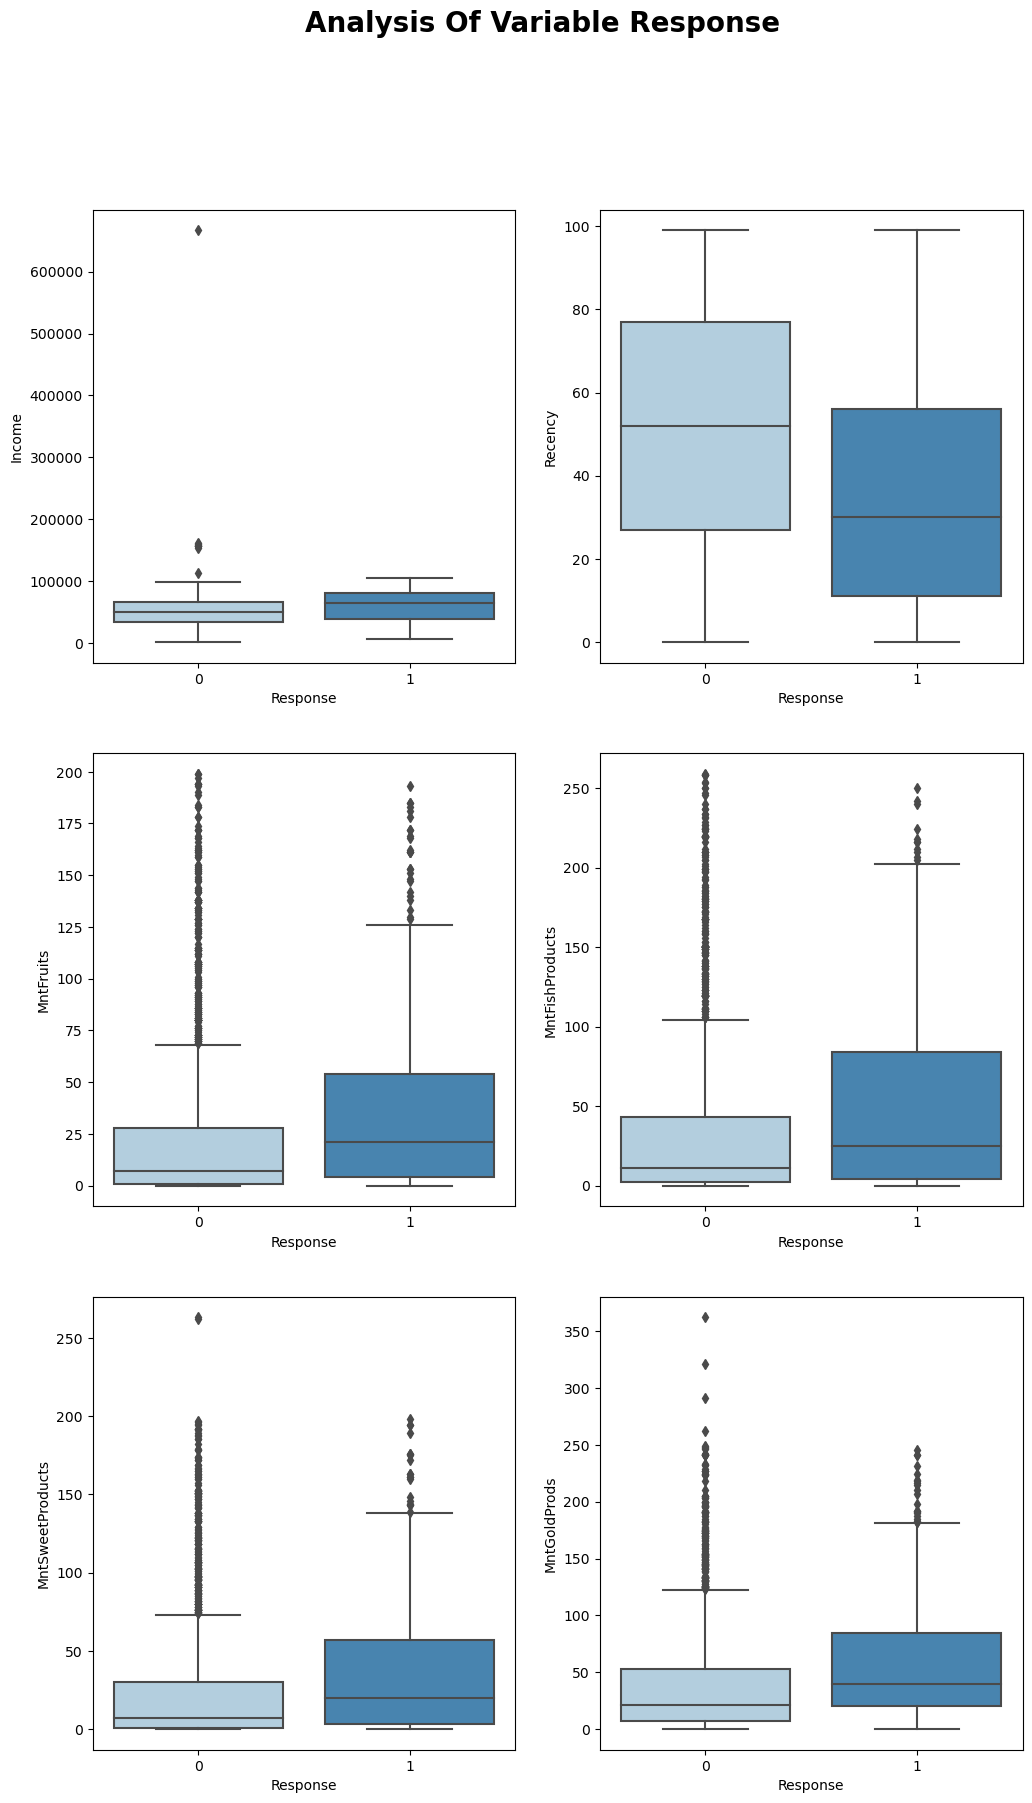

In [24]:
plt.figure(figsize = (12, 20))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Response", y="Income", palette = 'Blues', data=store)

plt.subplot(3,2,2)
sns.boxplot(x="Response", y="Recency", palette = 'Blues', data=store)

plt.subplot(3,2,3)
sns.boxplot(x="Response", y="MntFruits", palette = 'Blues', data=store)

plt.subplot(3,2,4)
sns.boxplot(x="Response", y="MntFishProducts", palette = 'Blues', data=store)

plt.subplot(3,2,5)
sns.boxplot(x="Response", y="MntSweetProducts", palette = 'Blues', data=store)

plt.subplot(3,2,6)
sns.boxplot(x="Response", y="MntGoldProds", palette = 'Blues', data=store)

<AxesSubplot: xlabel='Complain', ylabel='count'>

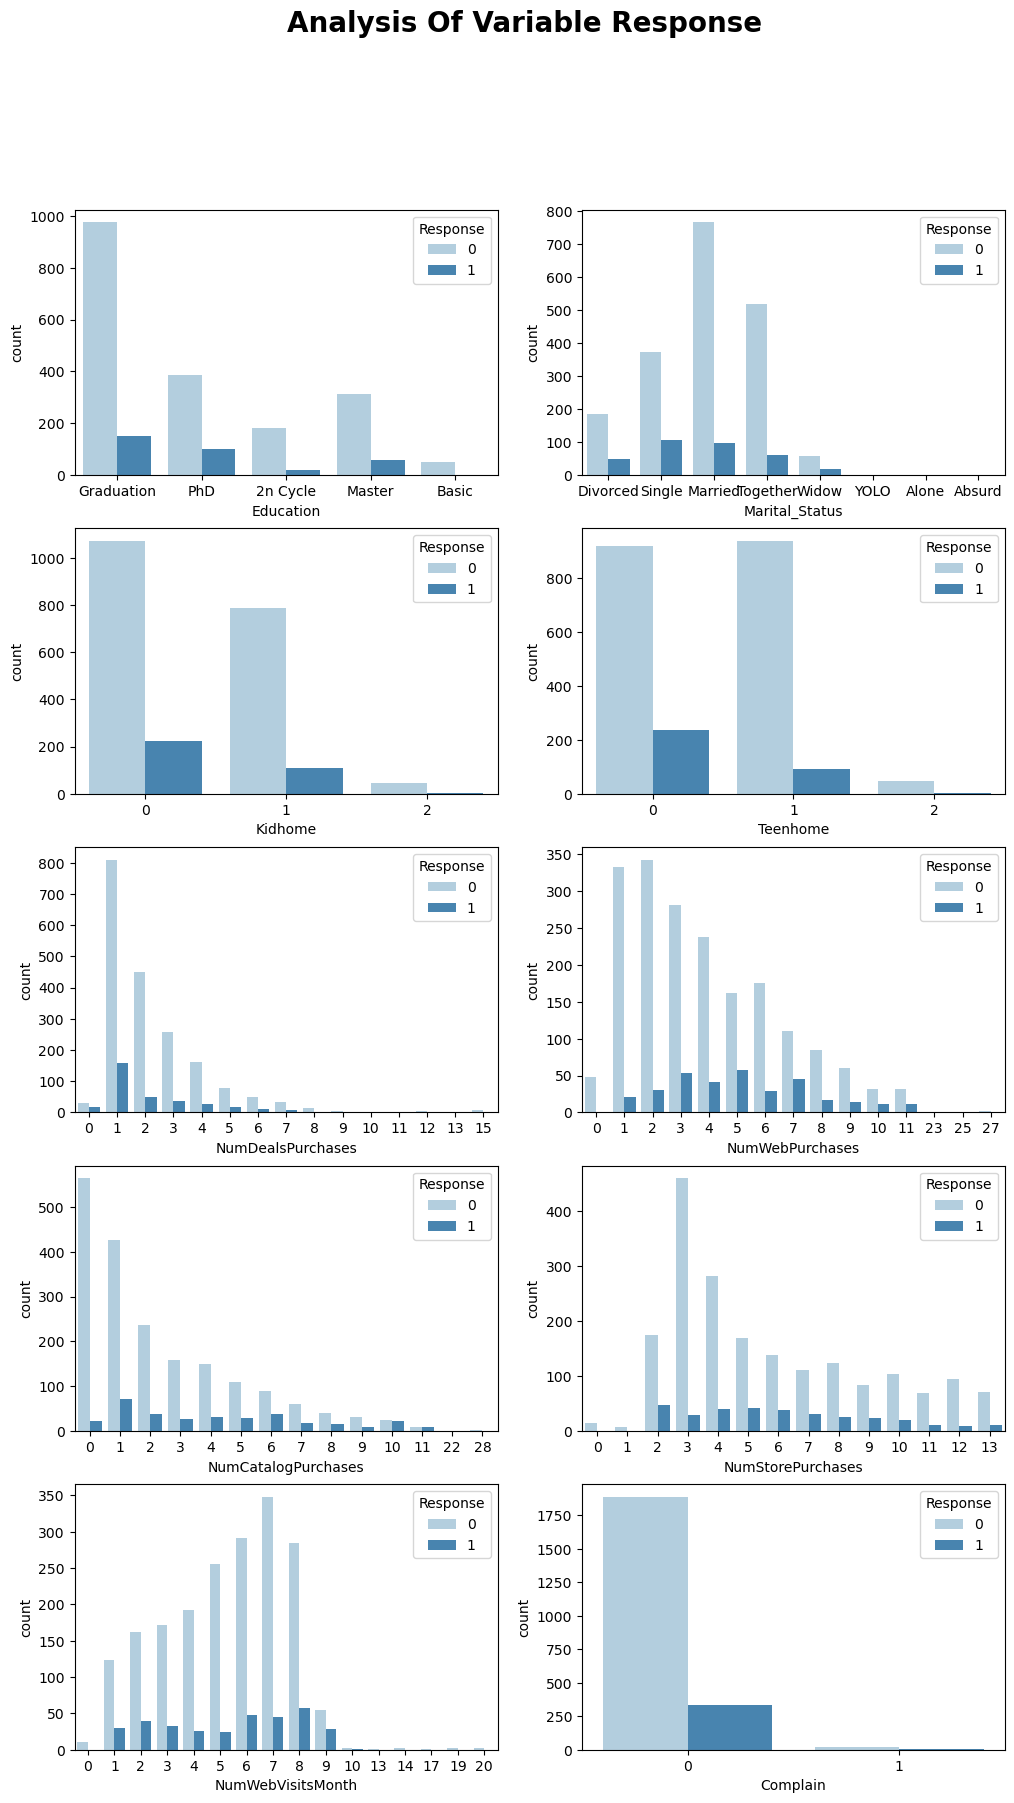

In [27]:
plt.figure(figsize = (12, 20))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'Education', hue = 'Response', palette = 'Blues', data = store)

plt.subplot(5,2,2)
sns.countplot(x = 'Marital_Status', hue = 'Response', palette = 'Blues', data = store)

plt.subplot(5,2,3)
sns.countplot(x = 'Kidhome', hue = 'Response', palette = 'Blues', data = store)

plt.subplot(5,2,4)
sns.countplot(x = 'Teenhome', hue = 'Response', palette = 'Blues', data = store)

plt.subplot(5,2,5)
sns.countplot(x = 'NumDealsPurchases', hue = 'Response', palette = 'Blues', data = store)

plt.subplot(5,2,6)
sns.countplot(x = 'NumWebPurchases', hue = 'Response', palette = 'Blues', data = store)

plt.subplot(5,2,7)
sns.countplot(x = 'NumCatalogPurchases', hue = 'Response', palette = 'Blues', data = store)

plt.subplot(5,2,8)
sns.countplot(x = 'NumStorePurchases', hue = 'Response', palette = 'Blues', data = store)

plt.subplot(5,2,9)
sns.countplot(x = 'NumWebVisitsMonth', hue = 'Response', palette = 'Blues', data = store)

plt.subplot(5,2,10)
sns.countplot(x = 'Complain', hue = 'Response', palette = 'Blues', data = store)